# <font color='blue'>MAI5002 - Fundamentos de Matemática Aplicada</font>

## Terceira Avaliação 04/12/2020

### Prof. Luis Gustavo Nonato  

ICMC-USP

----

## <font color='blue'> Instruções para Avaliação 3</font>
<font color='blue'> Os seguintes passos devem ser seguidos para realizar a avaliação:

1. Assine a lista de presença `lista de presenca` disponível no arquivo que está no diretório _Avaliacao 3/Entrega Avaliacao 3_ do repositório Google Drive
2. Baixe e renomeie o notebook `MAI5002 avaliacao 3.ipynb` com seu nome e número USP
3. Uma vez que tenha concluído a avaliação, faça upload do notebook (renomeado) no diretório _Avaliacao 3/Entrega Avaliacao 3_

O diretório _Avaliacao 3/Entrega Avaliacao 3_ estará aberto para upload até as 17h do dia 06/12. Após esta data e horário não será possível fazer o upload.

Você precisa incluir o código Python que calcula o resultado da questão. 
Todas as questões da prova valem 2.5 pontos.
</font>

<font color='red'> Não esqueça de renomear o notebook com seu nome e número USP antes de fazer upload no Drive. <br><br>Por exemplo: <br><br> **Gustavo_Nonato_3223813.ipynb** <br><br> Insira também seu nome e número USP na célula abaixo.</font>

---

**Nome:** Bruno Fernandes Bessa de Oliveira

**\#USP:** 5881890

---

### Questão 1) 
A área de um cone de altura $h$ e raio $r$ é dada pela função

$$
A(r,h)=\pi r(r+\sqrt{h^2+r^2})
$$

Utilize o método de Newton para encontar o raio de um cone com altura $h=9$ e área de 750.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

Vamos utlizar o método de Newton para obter o zero da função f. 
$$
f(r, h) = \pi r(r+\sqrt{h^2+r^2}) -A
$$
$$
\frac{df}{dr}(r, h) = \frac{\pi(r+\sqrt{h^2+r^2})^2}{\sqrt{h^2+r^2}}
$$

Utiizando método de Newton inicializado com valor da ordem de grandeza de h: r_inicio = 9.
Zero da função r = 10.102142188104505 encontrado.
f(r) = 0.0
Visualização do ponto zero da função:


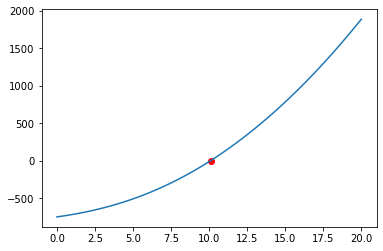

In [2]:
# Solução:

r = np.linspace(0,20,1000)
h = 9
A = 750
f   = lambda r: np.pi * r * (r + np.sqrt(h**2 + r**2)) - A
df  = lambda r: np.pi * (r + np.sqrt(h**2 + r**2))**2 / (np.sqrt(h**2 + r**2))

def Newton_Parelepipedae(r_inicio):
    ri = r_inicio
    i = 1
    for i in range(20):
        ri = ri - f(ri)/df(ri)
        i += 1
    return ri

r_inicio = h
r_0 = Newton_Parelepipedae(r_inicio)

print('Utiizando método de Newton inicializado com valor da ordem de grandeza de h: r_inicio = {}.'.format(r_inicio))
print('Zero da função r = {} encontrado.'.format(r_0))
print('f(r) = {}'.format(f(r_0)))
print('Visualização do ponto zero da função:')
plt.plot(r, f(r))
plt.scatter(r_0,f(r_0),color='red')

### Questão 2)
Encontre a solução do sistema de equações abaixo que está no quadrante $x>0$ e $y>0$.

$$
h_1(x,y)=1-x\cos(y)-x=0\\
h_2(x,y)=x\sin(y)-0.1x^2 + e^{-x}-1=0 
$$

Utiizaremos o método de Newton aplicado ao sistema de equações proposto. Para este fim vamos calcular a matriz Jacobiana:
$$
J = 
\begin{bmatrix}
\frac{\partial h_1}{\partial x} & \frac{\partial h_1}{\partial y} \\  
\frac{\partial h_2}{\partial x} & \frac{\partial h_2}{\partial y} \\ 
\end{bmatrix}=
\begin{bmatrix}
-cos(y)-1 & sin(y)-0.2x - e^{-x} \\
xsin(y)   & xcos(y)
\end{bmatrix}
$$

Ademais, vamos inicializar o método com pontos no primeiro quadrante: (x, y) = (0.5, 0.5)

In [3]:
# Solução:

h1 = lambda x, y: 1 - x*np.cos(y) - x
h2 = lambda x, y: x*np.sin(y) - 0.1*x**2 + np.exp(-x) -1
J = lambda x, y: np.array([[-1*np.cos(y) - 1, np.sin(y) - 0.2*x - np.exp(-x)],
                           [x*np.sin(y)     , x*np.cos(y)                   ]])

# condições iniciais
x_inicio = np.array([.5, .5])

def Newton_Sistema(x_inicio):
    xi = x_inicio
    H = np.zeros(2)
    for i in range(20):
        H[:] = [h1(xi[0], xi[1]), h2(xi[0], xi[1])]
        Dx = np.linalg.solve(J(xi[0], xi[1]), -H)
        xi = xi + Dx
    return xi
    
p_solucao = Newton_Sistema(x_inicio)
print('A solução do sistema encontrada foi: (x, y) = ({:.2f},{:.2f})'.format(p_solucao[0], p_solucao[1]))

A solução do sistema encontrada foi: (x, y) = (0.63,0.94)


Porém se investigarmos mais a fundo a natureza das funções obtidas veremos que no primeiro quadrante há uma família de soluções, pois há a formação de modos harmônicos nas soluções do sistema. A solução geral será (para k um número natural):
$$
x, y = 0.63, 0.94 + 2k\pi\\
$$

Vamos mostrar graficamente abaixo a natureza harmônica da solução.

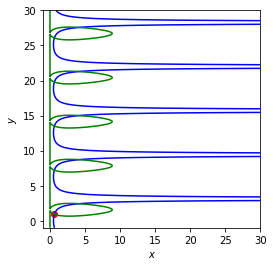

In [4]:
xx1, xx2 = np.meshgrid(np.linspace(-1, 30, 1000),np.linspace(-1, 30, 1000))
zz1 = 1 - xx1*np.cos(xx2) - xx1
zz2 = xx1*np.sin(xx2) - 0.1*xx1**2 + np.exp(-1*xx1) -1

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
CS1 = ax.contour(xx1, xx2, zz1,levels = [0.0],colors='b')
CS2 = ax.contour(xx1, xx2, zz2,levels = [0.0],colors='g')
plt.scatter(p_solucao[0], p_solucao[1],color='red')

In [5]:
print('Demonstrando numericamente que a solução periódica resolve o sistema (k inteiro aleatório, 4 casas decimais): \n')

for i in range(10):
    k = np.random.randint(0, 1000)
    h1_teste = h1(p_solucao[0], p_solucao[1] + 2*k*np.pi)
    h2_teste = h2(p_solucao[0], p_solucao[1] + 2*k*np.pi)
    print('k={}: h1={:.4f},  h2={:.4f}'.format(k, h1_teste, h2_teste))

Demonstrando numericamente que a solução periódica resolve o sistema (k inteiro aleatório, 4 casas decimais): 

k=761: h1=-0.0000,  h2=-0.0000
k=426: h1=-0.0000,  h2=-0.0000
k=285: h1=-0.0000,  h2=-0.0000
k=691: h1=-0.0000,  h2=-0.0000
k=990: h1=-0.0000,  h2=-0.0000
k=84: h1=-0.0000,  h2=-0.0000
k=839: h1=-0.0000,  h2=-0.0000
k=740: h1=-0.0000,  h2=-0.0000
k=984: h1=-0.0000,  h2=-0.0000
k=658: h1=-0.0000,  h2=-0.0000


### Questão 3)
Quais devem ser as dimensões de um paralelepípedo com área 50$cm^2$ para que ele tenha volume máximo?

**Dica**: Lembre-se que a área do paralelepípedo é: $A=2ab+2bc+2ac$, onde $a,b,c$ são os comprimentos dos lados.

Utilizaremos os multiplicadores de Lagrange para encontrar o mínimo da função volume. Para tanto, definiremos o volume como um número negativo. Teremos:
$$
f = -abc \\
g = 2(ab + bc + ac) - 50 \\
$$

Pelo método de Lagrange temos
$$
F = f - \lambda g \\
\nabla F = 0
$$

Resultando no sistema abaixo:
$$
h_1 = -bc + 2 \lambda (b + c) \\
h_2 = -ac + 2 \lambda (a + c) \\
h_3 = -ab + 2 \lambda (a + b) \\
h_4 = 2 \lambda (ab + bc + ac)
$$

A matrix Jacobiana será dada por:
$$
J = 
\begin{bmatrix}
\frac{\partial h_1}{\partial a} & \frac{\partial h_1}{\partial b} & \frac{\partial h_1}{\partial c} & \frac{\partial h_1}{\partial \lambda}\\  
\frac{\partial h_2}{\partial a} & \frac{\partial h_2}{\partial b} & \frac{\partial h_2}{\partial c} & \frac{\partial h_2}{\partial \lambda}\\ 
\frac{\partial h_3}{\partial a} & \frac{\partial h_3}{\partial b} & \frac{\partial h_3}{\partial c} & \frac{\partial h_3}{\partial \lambda}\\ 
\frac{\partial h_4}{\partial a} & \frac{\partial h_4}{\partial b} & \frac{\partial h_4}{\partial c} & \frac{\partial h_4}{\partial \lambda}\\ 
\end{bmatrix} =
\begin{bmatrix}
0              & -c+2 \lambda   & -b+2 \lambda   & 2(b+c) \\
-c+2 \lambda   & 0              & -a+2 \lambda   & 2(a+c) \\
-b+2 \lambda   & -a+2 \lambda   & 0              & 2(b+b) \\
2 \lambda(b+c) & 2 \lambda(a+c) & 2 \lambda(b+a) & 0 \\
\end{bmatrix}
$$

In [6]:
# a, b, c, lambda = x[0], x[1], x[2], x[3]
A = 50
f = lambda x: -x[0]*x[1]*[2] 
g = lambda x: 2*(x[0]*x[1] + x[1]*x[2] + x[0]*x[2]) - A

h1 = lambda x:   -x[1]*x[2] + 2*x[3]*(x[1] + x[2])
h2 = lambda x:   -x[0]*x[2] + 2*x[3]*(x[0] + x[2])
h3 = lambda x:   -x[0]*x[1] + 2*x[3]*(x[0] + x[1])
h4 = lambda x: 2*(x[0]*x[1] + x[1]*x[2] + x[0]*x[2]) - A

J = lambda x: np.array([[              0,   -x[2] + 2*x[3],   -x[1] + 2*x[3], 2*(x[1] + x[2])],
                        [ -x[2] + 2*x[3],                0,   -x[0] + 2*x[3], 2*(x[0] + x[2])],
                        [ -x[1] + 2*x[3],   -x[0] + 2*x[3],                0, 2*(x[0] + x[1])],
                        [2*(x[1] + x[2]),   2*(x[0] + x[2]), 2*(x[1] + x[0]),              0]])

def Newton_Volume(x_0):
    n = 1000
    x = np.array(x_0)  
    H = np.zeros(4)
    for i in range(1, n):
        H[:] = [h1(x), h2(x), h3(x), h4(x)]
        dx   = np.linalg.solve(J(x), -H)
        x    = x + dx    
    return(x)

x0 = np.array([3.1, 3.1, 3.1, 1])
s = Newton_Volume(x0)
print('A solução é: \n a={:.4f}\n b={:.4f}\n c={:.4f}\n lambda={:.4f}'.format(s[0], s[1], s[2], s[3]))

A solução é: 
 a=2.8868
 b=2.8868
 c=2.8868
 lambda=0.7217


### Questão 4)
Considere o conjunto de pontos gerados na célula abaixo. Interpole os pontos utilizando splines cúbicas e faça o gráfico dos pontos e do gráfico da função interpoladora.

In [7]:
X = np.zeros((2,30))
X[0,:] = np.linspace(-1,1,30)
X[1,:] = np.random.normal(0,0.5,30)

Os pontos originais gerados são:

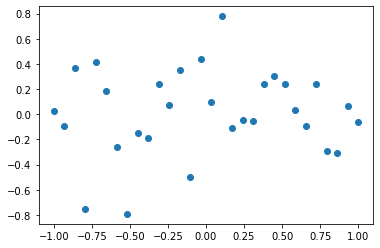

In [8]:
plt.scatter(X[0], X[1])

Vamos utilizar a implementação das splines cúbicas da biblioteca scipy:

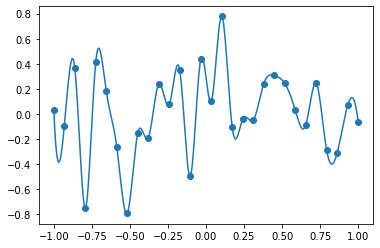

In [9]:
cs = scipy.interpolate.CubicSpline(X[0], X[1])

t = np.linspace(-1.0, 1.0, 1000)
pcs = cs(t)

plt.scatter(X[0], X[1])
plt.plot(t,pcs)